# Homework 4: Panda

In [136]:
import numpy as np
import pandas as pd

In [137]:
laptops = pd.read_csv('laptops.csv', encoding = 'latin-1')

In [138]:
laptops.head()

Manufacturer   Model Name   Category Screen Size  \
0        Apple  MacBook Pro  Ultrabook       13.3"   
1        Apple  Macbook Air  Ultrabook       13.3"   
2           HP       250 G6   Notebook       15.6"   
3        Apple  MacBook Pro  Ultrabook       15.4"   
4        Apple  MacBook Pro  Ultrabook       13.3"   

                               Screen                         CPU   RAM  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

               Storage                           GPU Operating System  \
0            128GB SSD  Intel Iris Plus Graphics 640            macOS   
1  128GB Flash Storage        Intel HD Graphics 6000            macOS   
2            256GB SSD         Intel HD Graphics 620            No OS   
3            512GB SSD            AMD Radeon Pro 455            macOS   
4            256GB SSD  Intel Iris Plus Graphics 650            macOS   

  Operating System Version  Weight Price (Euros)  
0                      NaN  1.37kg       1339,69  
1                      NaN  1.34kg        898,94  
2                      NaN  1.86kg        575,00  
3                      NaN  1.83kg       2537,45  
4                      NaN  1.37kg       1803,60

## 1. Redo the cleaning processes as presented in the data cleaning notebook, that include:

•Clean column names
•Convert RAM, Price, Weight into numerical columns (create new columns)
•Extract CPU speed from CPU column
•Correcting values of os column
•Handle missing values of os_version column

### Clean colunm names

In [139]:
def clean_str(s):
    s = s.strip()
    s = s.replace('Operating System', "os")
    s = s.replace(' ', '_')
    s = s.replace('(', '')
    s = s.replace(')', '')
    s = s.lower()
    return s

col_names = [clean_str(name) for name in laptops.columns]
laptops.columns = col_names
laptops.columns

Index(['manufacturer', 'model_name', 'category', 'screen_size', 'screen',
       'cpu', 'ram', 'storage', 'gpu', 'os', 'os_version', 'weight',
       'price_euros'],
      dtype='object')

 ### Convert RAM, Price, Weight into numerical columns (create new columns)

In [140]:
laptops['ram_gb'] = laptops.ram.str.slice(0,-2).astype('int')

In [141]:
laptops["price_euros_num"] = laptops.price_euros.str.replace(",", ".").astype("float")

In [142]:
laptops['weight_kg'] = laptops.weight.str.replace("kg", "").str.replace("s", "").astype("float")

### Extract CPU speed from CPU column

In [143]:
laptops['cpu_speed'] = laptops.cpu.str.split().apply(lambda ls: ls[-1]).str.slice(0,-3).astype('float')

In [144]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
manufacturer       1303 non-null object
model_name         1303 non-null object
category           1303 non-null object
screen_size        1303 non-null object
screen             1303 non-null object
cpu                1303 non-null object
ram                1303 non-null object
storage            1303 non-null object
gpu                1303 non-null object
os                 1303 non-null object
os_version         1133 non-null object
weight             1303 non-null object
price_euros        1303 non-null object
ram_gb             1303 non-null int32
price_euros_num    1303 non-null float64
weight_kg          1303 non-null float64
cpu_speed          1303 non-null float64
dtypes: float64(3), int32(1), object(13)
memory usage: 168.0+ KB


### Correcting values of os column 

In [145]:
laptops.loc[laptops.os == 'Mac OS', 'os'] = 'macOS'

laptops.os.unique()

array(['macOS', 'No OS', 'Windows', 'Linux', 'Android', 'Chrome OS'],
      dtype=object)

 ### Handle missing values of os_version column

In [146]:
# What are the os of the laptops with null values in os_version ?
laptops.os_version.value_counts(dropna = False)
laptops.loc[laptops.os_version.isnull(), "os"].value_counts()

No OS        66
Linux        62
Chrome OS    27
macOS        13
Android       2
Name: os, dtype: int64

In [147]:
# What are the most popular os_version of laptop that run macOS ?
laptops.loc[laptops.os == "macOS", "os_version"].value_counts(dropna = False)

NaN    13
X       8
Name: os_version, dtype: int64

In [148]:
# Fill out some Nan value of os_version column based on the information of os column.

laptops.loc[laptops.os == "No OS", "os_version"] = "No OS"
laptops.loc[laptops.os == "macOS", "os_version"] = "X"

In [149]:
# Now the number of NaN value is reduced to 91
laptops.os_version.value_counts(dropna = False)

10       1072
NaN        91
No OS      66
7          45
X          21
10 S        8
Name: os_version, dtype: int64

In [150]:
# Drop the rows with NaN values: 
laptops.dropna(inplace = True)

In [151]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1302
Data columns (total 17 columns):
manufacturer       1212 non-null object
model_name         1212 non-null object
category           1212 non-null object
screen_size        1212 non-null object
screen             1212 non-null object
cpu                1212 non-null object
ram                1212 non-null object
storage            1212 non-null object
gpu                1212 non-null object
os                 1212 non-null object
os_version         1212 non-null object
weight             1212 non-null object
price_euros        1212 non-null object
ram_gb             1212 non-null int32
price_euros_num    1212 non-null float64
weight_kg          1212 non-null float64
cpu_speed          1212 non-null float64
dtypes: float64(3), int32(1), object(13)
memory usage: 165.7+ KB


## 2. Convert Screen Size column in to numeric and use that column to answer:
•What is the popular screen size ?
•What is the minimum screen size of Ultrabook ?
•What is the average screen size of gaming laptop ?


### Convert Screen Size column into numeric

In [152]:
# Check if there is any abnormal values in screen_size column:
laptops.screen_size.unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"', '17.0"',
       '15.0"', '14.1"', '11.3"', '10.1"'], dtype=object)

In [153]:
laptops['screen_size_inch'] = laptops.screen_size.str.slice(0, -1).astype('float')

laptops.screen_size_inch.describe()

count    1212.000000
mean       15.046122
std         1.396413
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.400000
Name: screen_size_inch, dtype: float64

## 3. Extract Screen Resolution (for example 2880x1800), and answer:
•How many laptop has full hd (1920x1080) screen ?
•What is the popular screen resolution of Macbook ?


#### •How many laptop has full hd (1920x1080) screen ?

In [154]:
# Split strings in screen column, then take only the final string (which is the resolution)
laptops['screen_resolution'] = laptops.screen.str.split().apply(lambda ls: ls[-1])

In [155]:
num = laptops.loc[laptops.screen_resolution == '1920x1080', 'screen_resolution'].count()
print('There are', num, 'laptops which have full hd (1920x1080) screen')

There are 806 laptops which have full hd (1920x1080) screen


#### •What is the popular screen resolution of Macbook ?


In [156]:
laptops.loc[laptops.model_name.str.startswith('Mac'),'screen_resolution'].value_counts()

2560x1600    6
2304x1440    6
1440x900     4
2880x1800    4
1366x768     1
Name: screen_resolution, dtype: int64

The popular screen resolution of Macbook is 2304x1440 and 2560x1600

## 4. Using column storage to create 3 new columns
named: storage_gb, storage_ssd, storage_hdd. storage_gb stores the volume of the storage. 

 - storage_ssd indicates whether a storage is ssd; values of storage_ssd is either 0 or 1 where 1 means the storage device is ssd. 

 - storage_hdd indicates whether a storage is hdd; values of storage_hdd is either 0 or 1 where 1 means the storage device is hdd. 

Use this column to answer:

 - How many laptop have ssd storage ? 

 - How many laptop have hdd storage ?

 - On a same plot, plot a histogram for the volume of ssd storage and a histogram for the volume of hdd storage.


In [157]:
laptops.storage.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '512GB SSD +  256GB SSD',
       '512GB SSD +  2TB HDD', '64GB Flash Storage +  1TB HDD', '1GB SSD',
       '1TB HDD +  1TB HDD', '32GB HDD', '1TB SSD +  1TB HDD',
       '512GB Flash Storage', '128GB HDD', '240GB SSD', '8GB SSD',
       '508GB Hybrid', '512GB SSD +  1TB Hybrid',
       '256GB SSD +  1TB Hybrid'], dtype=object)

In [158]:
# Noticing that the storage column has some values like '256GB SSD+  2TB HDD', 
# we separate the string by '+' and take the first one. For example we take '256GB SSD' out of '256GB SSD +  2TB HDD'.

laptops['storage_main'] = laptops.storage.str.split('+', expand = True)[0]

In [159]:
# Then split the string again to get the storage value. Ex: get '256GB' out of '256GB SSD'.

laptops['storage_gb'] = laptops.storage_main.str.split(expand = True)[0]

In [160]:
laptops.storage_gb.unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '32GB', '64GB', '2TB',
       '1GB', '240GB', '8GB', '508GB'], dtype=object)

In [161]:
# Notice that there are 2 values has TB instead of GB. We change them to GB: 

laptops.loc[laptops.storage_gb == '1TB', 'storage_gb'] = '1000GB'
laptops.loc[laptops.storage_gb == '2TB', 'storage_gb'] = '2000GB'

In [162]:
# We do not take GB, then tranform the string type into integer type:

laptops.storage_gb = laptops.storage_gb.str.slice(0,-2).astype('int')

In [163]:
# For the type of storage, we split the first element of the string by the white space, then take the second part.
# Then we strip out all remained whitespaces.

laptops['storage_type'] = laptops.storage_main.str.split(' ', 1).apply(lambda ls: ls[-1]).str.strip()

laptops.storage_type.unique()

array(['SSD', 'Flash Storage', 'HDD', 'Hybrid'], dtype=object)

In [164]:
# Create storage_ssd column:

laptops['storage_ssd'] = [1 if x =='SSD' else 0 for x in laptops.storage_type]

In [165]:
ssd = laptops.storage_ssd.sum()

In [166]:
print('There are', ssd, 'laptops that has SSD storage')

There are 816 laptops that has SSD storage


In [167]:
# Create storage_hdd column:

laptops['storage_hdd'] = [1 if x =='HDD' else 0 for x in laptops.storage_type]

In [168]:
hdd = laptops.storage_hdd.sum()

In [169]:
print('There are', hdd, 'laptops that has HDD storage')

There are 333 laptops that has HDD storage


### Visualization

Plot a histogram for the volume of ssd storage and a histogram for the volume of hdd storage.

In [170]:
import matplotlib.pyplot as plt

In [171]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [8, 6]

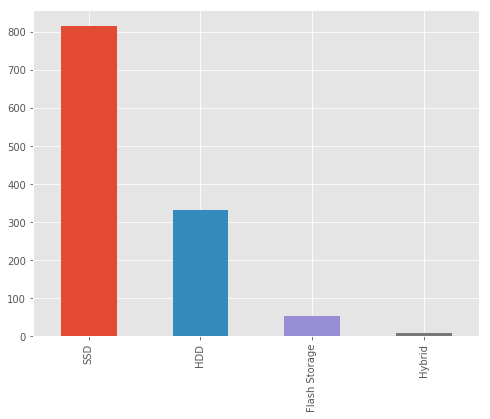

In [172]:
laptops.storage_type.value_counts().plot.bar()